Sales Summary:
  product  total_qty  revenue
0  Gadget          7     35.0
1   Gizmo          3     21.0
2  Widget         17     42.5


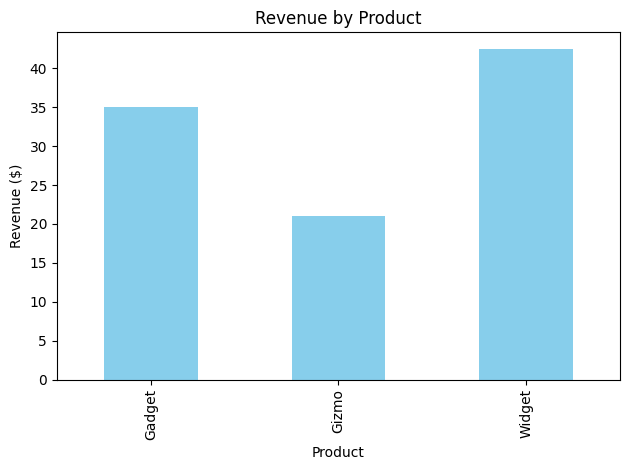

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create a simple sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Optional: Clear existing data and insert some new sample rows
cursor.execute("DELETE FROM sales")
sample_data = [
    ('Widget', 10, 2.5),
    ('Gadget', 5, 5.0),
    ('Widget', 7, 2.5),
    ('Gizmo', 3, 7.0),
    ('Gadget', 2, 5.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 3: Run SQL query to get total quantity and revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Step 4: Display results using print
print("Sales Summary:")
print(df)

# Step 5: Plot a bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color = 'skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()

# Optional: Save the chart
plt.savefig("sales_chart.png")
plt.show()


conn.close()
